In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
import folium
import warnings
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../models')
# import modules
import visualize
from maritime_traffic_network import MaritimeTrafficNetwork

['/Users/janhendrikwebert/maritime_route_prediction/src/visualization', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python311.zip', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/lib-dynload', '', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/site-packages', '../models', '../visualization', '../features']


In [3]:
# read raw data from file
#filename = '../../data/processed/202204_points_stavanger_cleaned_meta_2M.parquet'
filename = '../../data/processed/202204_points_stavanger_cleaned_meta_full.parquet'
gdf = gpd.read_parquet(filename)

In [4]:
# initialize maritime traffic network
network = MaritimeTrafficNetwork(gdf)
network.get_trajectories_info()

AIS messages: 5724512
Trajectories: 10636


In [5]:
# load significant points
filename = '../../data/processed/202204_significant_points_DP2e-4_clustered_stavanger_full.parquet'
precomputed = gpd.read_parquet(filename)
precomputed.set_geometry('geometry', inplace=True)
network.init_precomputed_significant_points(precomputed)

Loading significant turning points from file...
Number of significant points detected: 300592 (5.25% of AIS messages)


In [6]:
# load waypoints
filename = '../../data/processed/202204_waypoints_DP2e-4_HDBSCAN30_stavanger_full.parquet'
precomputed = gpd.read_parquet(filename)
precomputed.set_geometry('geometry', inplace=True)
network.init_precomputed_waypoints(precomputed)

Loading precomputed waypoints from file...
879 waypoints loaded


In [11]:
network.make_graph_from_waypoints(min_passages=10)

Created maritime traffic network graph from waypoints and trajectories
Number of nodes: 879
Number of edges: 1489
Time elapsed: 1.82 minutes



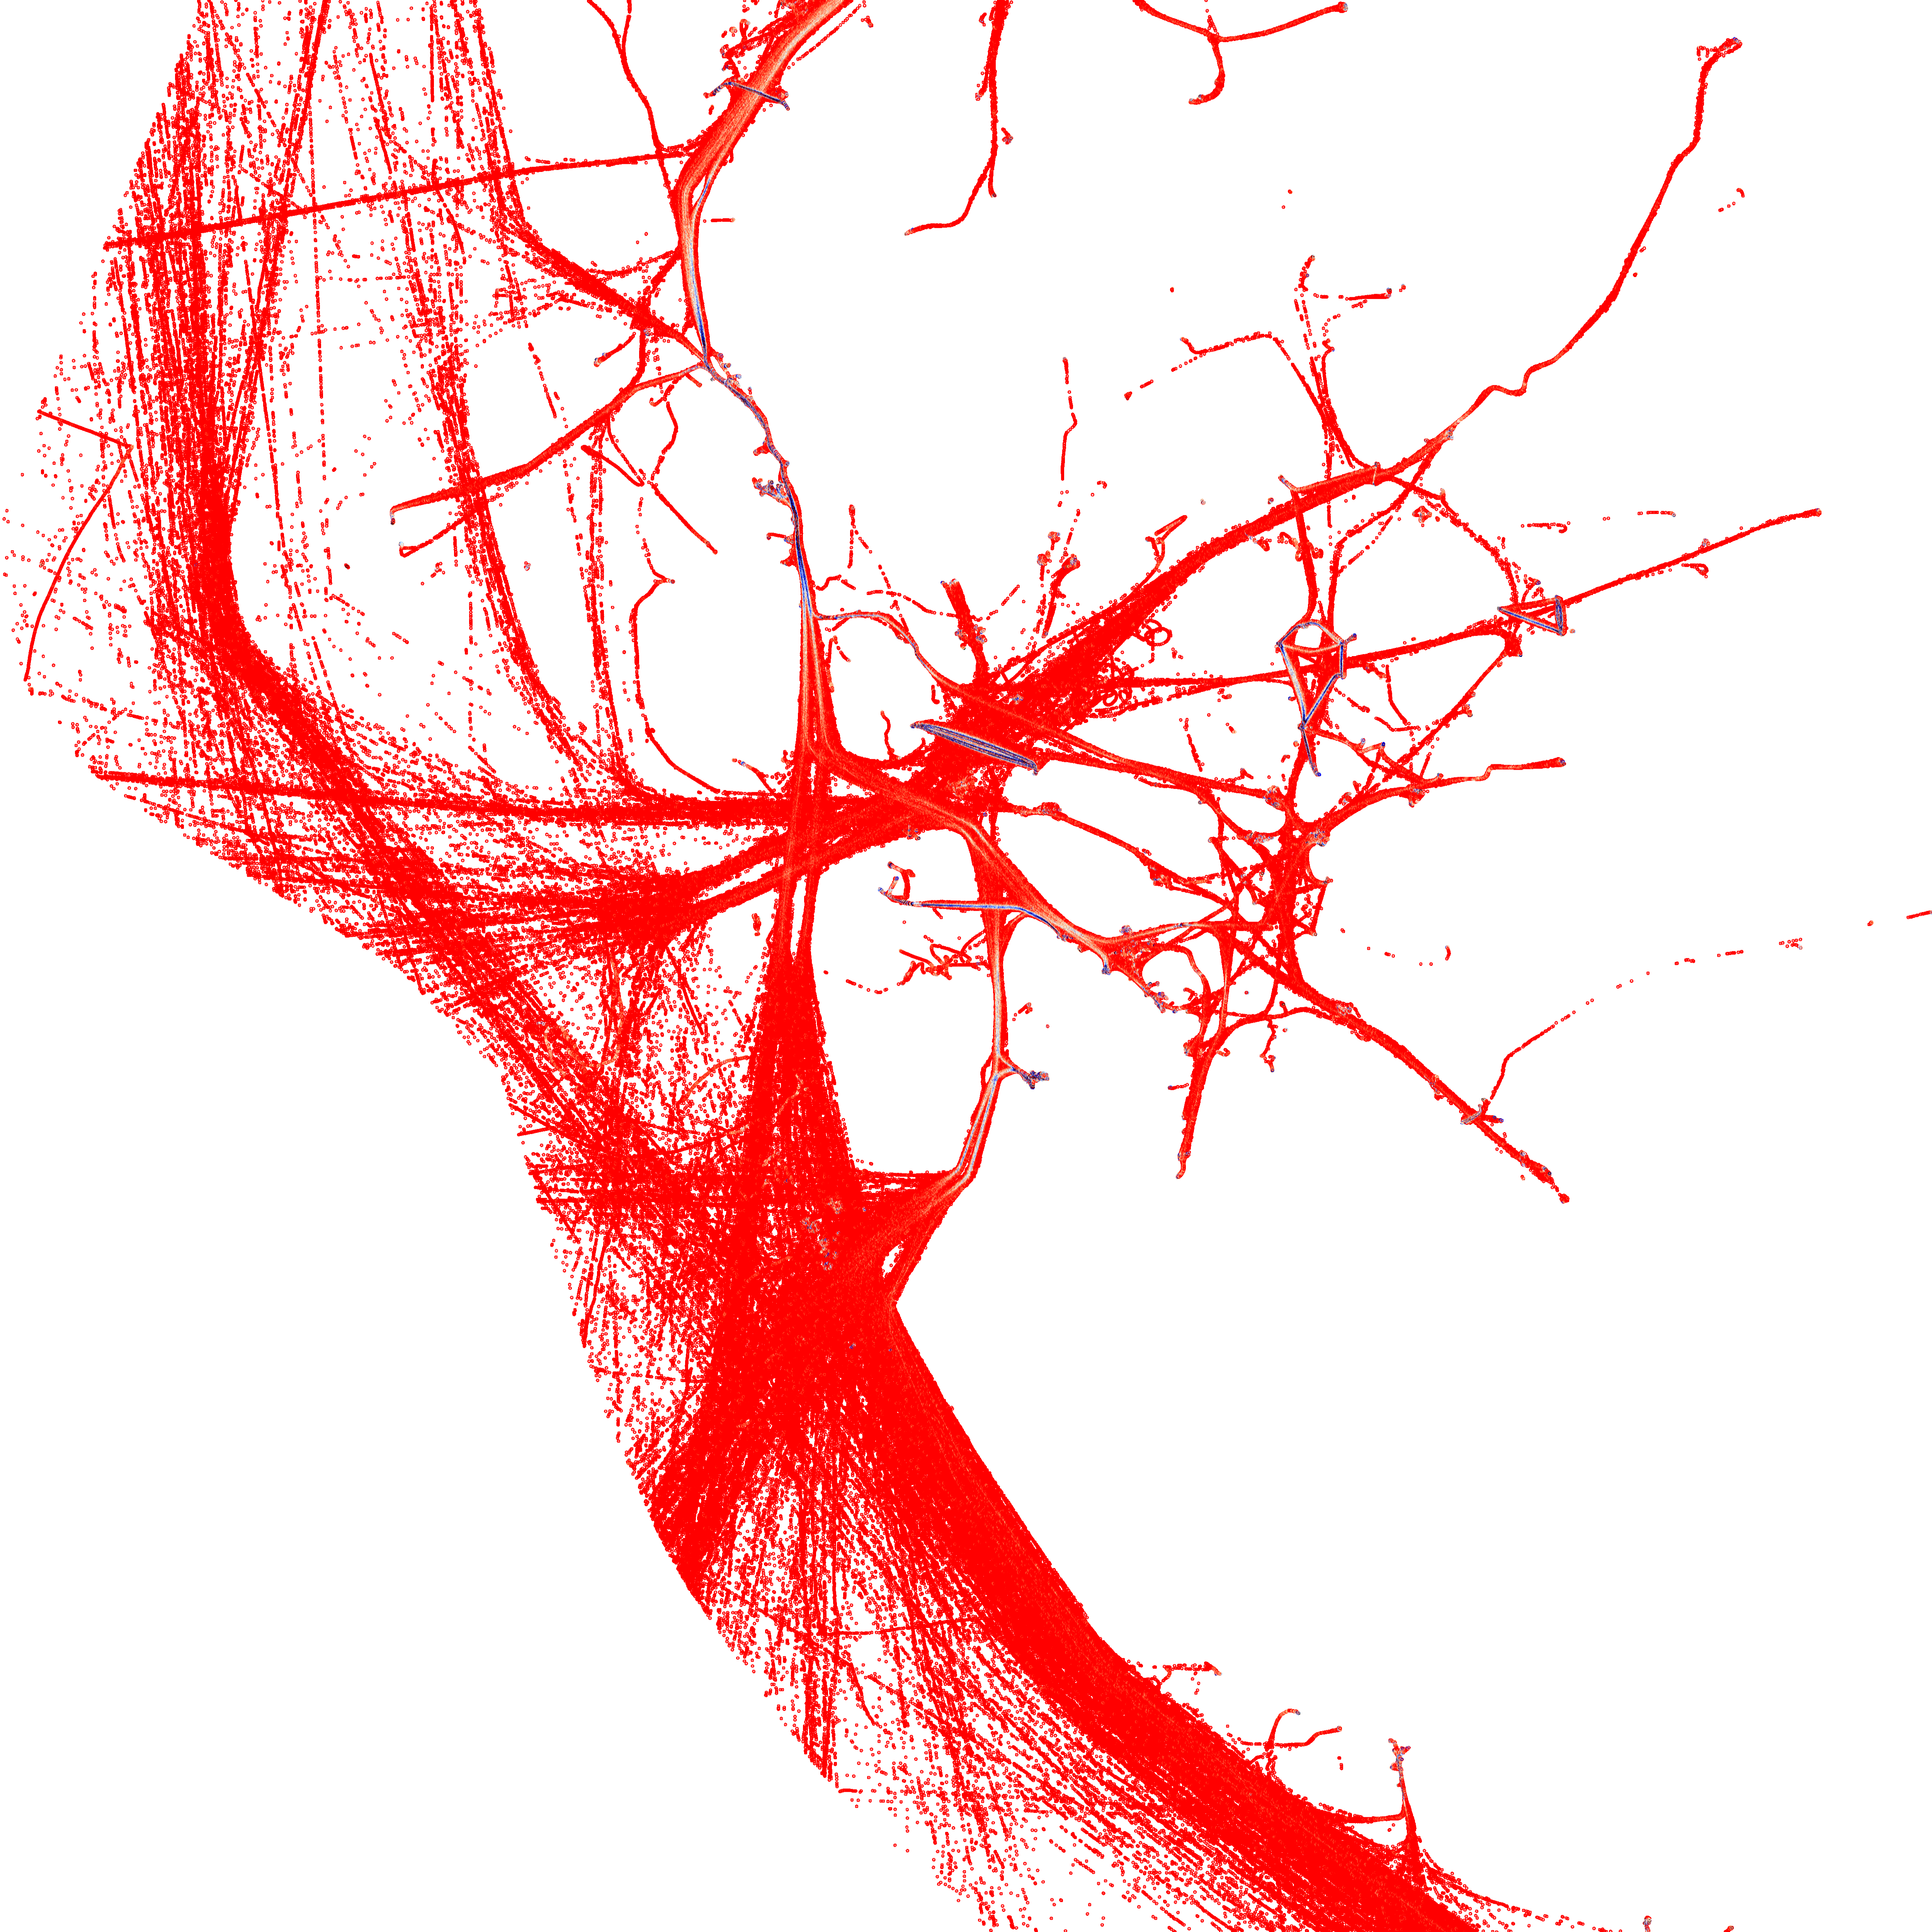

In [12]:
map = network.map_graph()
folium.LayerControl().add_to(map)
map
#map.save('../../reports/maps/202204_waypoints_DP2e-4_HDBSCAN30_stavanger_full.html')